<a href="https://colab.research.google.com/github/Jueunkim429/DeepLearning/blob/main/CNN_Cloud_DA4%2BNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install libarchive-c

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 78.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 71.7 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102752 sha256=f12933376ef511d16340027882d4348b8515f55aea749572b582cf1c43bd13f8
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [3]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from PIL import Image
import os, glob, numpy as np
import os
from sklearn.model_selection import train_test_split
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend import set_session as K
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from keras.preprocessing.image import ImageDataGenerator
import libarchive
import pydot
import cartopy

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import tensorflow.keras
print(tensorflow.keras.__version__)

2.12.0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Image를 학습데이터로 변환

In [8]:
img_dir =  "/content/drive/MyDrive/Colab Notebooks/clouddata/train4" #학습데이터로 변환할 데이터 위치
categories = os.listdir(img_dir)
num_classes = len(categories)

image_w = 64  #64*64*3 사이즈로 조정
image_h = 64

pixel=  image_w * image_h * 3
X=[]
y=[]

for idx, cat in enumerate(categories): # 카테고리를 enumerate를 이용하여 카테고리와 인덱스 사용
    img_dir_detail = img_dir + '/' + cat
    files = glob.glob(img_dir_detail + "/*.jpg")
    for i,f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert('RGB')
            img = img.resize((image_w,image_h)) #이미지의 사이즈를 조정
            data = np.asarray(img)
            X.append(data)
            y.append(idx)
            if i % 300 == 0 : # 300번 마다 프린트
                print(cat, " : ", f)
        except:
            print(cat,str(i)," 번째에서 에러")

X = np.array(X)  #array로 변환
y = np.array(y)  #array로 변환

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) #train test 구분

Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N163_0_181.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N168_0_4735.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N209_0_5639.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N253_0_7349.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N059_0_6502.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N111_0_8293.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N145_0_4242.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/Ns-N091.jpg
Ns  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/Ns/new_Ns-N026_0_7109.jpg
St  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/St/new_St-N103_0_5491.jpg
St  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train4/St/new_St-N105_0_6055.jpg
St  :  /content/drive/MyDrive/Col

## 학습데이터 가공

In [9]:
print(X_train.shape) # 데이터 크기 확인
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# img를 array로 변환시 0~255의 값을 가지는데 이것을 0~1로 변환
X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

from keras.utils import to_categorical
# 기존의 1의 값을가지는 y값을 [0,1,0,0,---]와 같이 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(8579, 64, 64, 3)
(8579,)
(3678, 64, 64, 3)
(3678,)


## 모델 구축

### model 1

In [10]:
image_w = 64
image_h = 64

with tf.device('/device:GPU:0'):
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax')) # 출력 레이어 수정

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_dir = './model'
    model_path = model_dir + "/cloud_classify.model"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [12]:
X_train.shape
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
242/242 [==============================] - 14s 9ms/step - loss: 1.2828 - accuracy: 0.4808 - val_loss: 1.1314 - val_accuracy: 0.5618
Epoch 2/100
242/242 [==============================] - 2s 7ms/step - loss: 1.0982 - accuracy: 0.5659 - val_loss: 1.0200 - val_accuracy: 0.6200
Epoch 3/100
242/242 [==============================] - 2s 7ms/step - loss: 0.9942 - accuracy: 0.6017 - val_loss: 0.9193 - val_accuracy: 0.6492
Epoch 4/100
242/242 [==============================] - 2s 7ms/step - loss: 0.8490 - accuracy: 0.6687 - val_loss: 0.7930 - val_accuracy: 0.6783
Epoch 5/100
242/242 [==============================] - 2s 7ms/step - loss: 0.7337 - accuracy: 0.7061 - val_loss: 0.6769 - val_accuracy: 0.7517
Epoch 6/100
242/242 [==============================] - 2s 7ms/step - loss: 0.6286 - accuracy: 0.7546 - val_loss: 0.5921 - val_accuracy: 0.7774
Epoch 7/100
242/242 [==============================] - 2s 7ms/step - loss: 0.5459 - accuracy: 0.7901 - val_loss: 0.5103 - val_accuracy: 0.808

In [13]:
print("정확도 : %.2f" %(model.evaluate(X_test, y_test)[1]))

115/115 [==============================] - 0s 4ms/step - loss: 0.4739 - accuracy: 0.9013
정확도 : 0.90


In [14]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9349
평균 손실: 0.1725
평균 검증 정확도: 0.8932
평균 검증 손실: 0.3718


### model 2

In [15]:
with tf.device('/device:GPU:0'):
    model2 = Sequential()

    model2.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))

    model2.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))

    model2.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model2.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))

    model2.add(Flatten())
    model2.add(Dense(256, activation = 'relu'))
    model2.add(Dropout(0.5))
    model2.add(Dense(num_classes, activation = 'softmax'))

    model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])

    model_dir = './model2'
    model_path = model_dir + "/cloud_classify.model2"

    checkpoint = ModelCheckpoint(filepath = model_path, monitor='val_loss', verbose = 1, save_best_only = True)
    early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)


In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)       

In [17]:
history = model2.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

Epoch 1/100
242/242 [==============================] - 5s 11ms/step - loss: 1.3424 - accuracy: 0.4301 - val_loss: 1.1914 - val_accuracy: 0.5245
Epoch 2/100
242/242 [==============================] - 2s 9ms/step - loss: 1.1749 - accuracy: 0.5271 - val_loss: 1.0995 - val_accuracy: 0.5478
Epoch 3/100
242/242 [==============================] - 2s 9ms/step - loss: 1.0556 - accuracy: 0.5732 - val_loss: 0.9407 - val_accuracy: 0.6317
Epoch 4/100
242/242 [==============================] - 2s 9ms/step - loss: 0.9452 - accuracy: 0.6240 - val_loss: 0.9381 - val_accuracy: 0.6375
Epoch 5/100
242/242 [==============================] - 2s 9ms/step - loss: 0.8247 - accuracy: 0.6766 - val_loss: 0.7292 - val_accuracy: 0.7273
Epoch 6/100
242/242 [==============================] - 2s 9ms/step - loss: 0.7244 - accuracy: 0.7121 - val_loss: 0.6835 - val_accuracy: 0.7541
Epoch 7/100
242/242 [==============================] - 2s 9ms/step - loss: 0.6431 - accuracy: 0.7494 - val_loss: 0.6687 - val_accuracy: 0.743

In [18]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9249
평균 손실: 0.1976
평균 검증 정확도: 0.8907
평균 검증 손실: 0.3504


### model2 + normalization

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

with tf.device('/device:GPU:0'):
    model3 = Sequential()

    model3.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:]))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Dropout(0.25))

    model3.add(Conv2D(64, (3,3), padding="same"))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Dropout(0.25))

    model3.add(Conv2D(128, (3,3), padding="same"))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(Conv2D(128, (3,3), padding="same"))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Dropout(0.25))

    model3.add(Flatten())
    model3.add(Dense(256, activation='relu'))
    model3.add(Dropout(0.5))
    model3.add(Dense(num_classes, activation='softmax'))

    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_dir = './model3'
    model_path = model_dir + "/cloud_classify.model3"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [22]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)       

In [27]:
history = model3.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

Epoch 1/100
242/242 [==============================] - 3s 13ms/step - loss: 0.1056 - accuracy: 0.9554 - val_loss: 0.3171 - val_accuracy: 0.9103
Epoch 2/100
242/242 [==============================] - 3s 13ms/step - loss: 0.0997 - accuracy: 0.9605 - val_loss: 0.1847 - val_accuracy: 0.9429
Epoch 3/100
242/242 [==============================] - 3s 13ms/step - loss: 0.1061 - accuracy: 0.9566 - val_loss: 0.1530 - val_accuracy: 0.9441
Epoch 4/100
242/242 [==============================] - 3s 13ms/step - loss: 0.1131 - accuracy: 0.9521 - val_loss: 0.2470 - val_accuracy: 0.9242
Epoch 5/100
242/242 [==============================] - 3s 13ms/step - loss: 0.0949 - accuracy: 0.9576 - val_loss: 0.3334 - val_accuracy: 0.9091
Epoch 6/100
242/242 [==============================] - 3s 13ms/step - loss: 0.0951 - accuracy: 0.9598 - val_loss: 0.1907 - val_accuracy: 0.9371
Epoch 7/100
242/242 [==============================] - 3s 13ms/step - loss: 0.1033 - accuracy: 0.9579 - val_loss: 1.9534 - val_accuracy:

In [28]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9700
평균 손실: 0.0723
평균 검증 정확도: 0.9076
평균 검증 손실: 0.6262


## test

### test data로 비교

In [31]:
from keras.models import load_model

path = "/content/drive/MyDrive/Colab Notebooks/clouddata/test/"
category = os.listdir("/content/drive/MyDrive/Colab Notebooks/clouddata/train4") #train위치

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(path+"/*.*")
for f in files:
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
prediction_test = model.predict(X)

file_index = 0
for i in prediction_test:
    label = i.argmax() # [0.000, 0.000, 0.000, ..., 0.000, 1.000, 0.000] 중 최대값 추출 즉,1값의 인덱스
    print("////////////////////")
    print( filenames[file_index].split('/')[-1] + "의 예측되는 구름종류 : " + category[label])
    file_index  = file_index+1

7/7 [==============================] - 0s 2ms/step
////////////////////
1.jpg의 예측되는 구름종류 : Sc
////////////////////
100.jpg의 예측되는 구름종류 : Cc
////////////////////
101.jpg의 예측되는 구름종류 : St
////////////////////
104.jpg의 예측되는 구름종류 : St
////////////////////
10.jpg의 예측되는 구름종류 : Sc
////////////////////
102.jpg의 예측되는 구름종류 : Cc
////////////////////
106.jpg의 예측되는 구름종류 : Cc
////////////////////
108.jpg의 예측되는 구름종류 : Sc
////////////////////
107.jpg의 예측되는 구름종류 : St
////////////////////
103.jpg의 예측되는 구름종류 : Cc
////////////////////
105.jpg의 예측되는 구름종류 : St
////////////////////
12.jpg의 예측되는 구름종류 : Sc
////////////////////
130.jpg의 예측되는 구름종류 : St
////////////////////
131.jpg의 예측되는 구름종류 : St
////////////////////
137.jpg의 예측되는 구름종류 : Sc
////////////////////
122.jpg의 예측되는 구름종류 : Sc
////////////////////
119.jpg의 예측되는 구름종류 : Sc
////////////////////
117.jpg의 예측되는 구름종류 : Cc
////////////////////
118.jpg의 예측되는 구름종류 : St
////////////////////
127.jpg의 예측되는 구름종류 : Sc
////////////////////
123.jpg의 예측되는 구름종류 : Cc
////////

### 직접 찍은 data로 비교

1/1 [==============================] - 0s 20ms/step
////////////////////


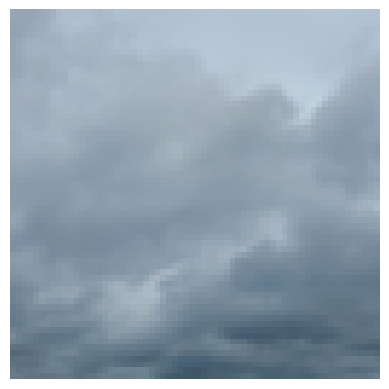

cloud.jpg의 예측되는 구름종류 : Cc
////////////////////


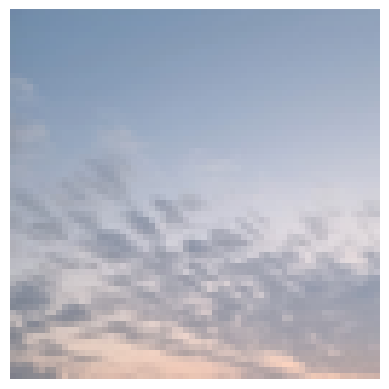

cloud1.jpg의 예측되는 구름종류 : Sc
////////////////////


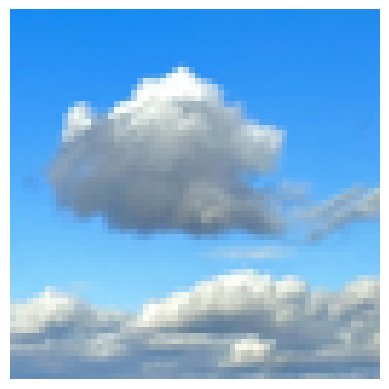

cloud2.jpg의 예측되는 구름종류 : Cc
////////////////////


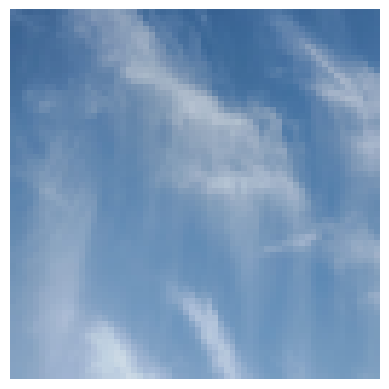

cloud3.jpg의 예측되는 구름종류 : Cc


In [32]:
from keras.models import load_model

path2 = "/content/drive/MyDrive/Colab Notebooks/mydata/"
category = os.listdir("/content/drive/MyDrive/Colab Notebooks/clouddata/train4")

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(path2+"/*.*")
for f in files:
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
prediction_test = model.predict(X)

file_index = 0
k=0
for i in prediction_test:
    label = i.argmax() # [0.000, 0.000, 0.000, ..., 0.000, 1.000, 0.000] 중 최대값 추출 즉,1값의 인덱스
    print("////////////////////")
    # Display the image
    plt.imshow(X[k])
    plt.axis('off')
    plt.show()
    print( filenames[file_index].split('/')[-1] + "의 예측되는 구름종류 : " + category[label])
    file_index  = file_index+1
    k=k+1